<a href="https://colab.research.google.com/github/johnjustine5646/Practise_AML2/blob/main/Practise_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
#importing the dataset from Hard Drive
df=pd.read_csv('/content/data - data.csv')
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
#dropping unwanted columns
df=df.drop(columns=['date','street','statezip'])

In [ ]:
df=df.drop(columns=['country'])

In [ ]:
#finding nulls
df.isnull().sum()#no nulls found

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['city2.0']=le.fit_transform(df['city'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,city2.0
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,36
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,35
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,18
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,3
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,35
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,3
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,32
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,35


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city2.0
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,25.674348
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,11.982721
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,17.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,32.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,35.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,43.000000


In [ ]:
#converting to dataframe
df=pd.DataFrame(df)#converted

In [ ]:
#finding datatypes
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              object
city2.0            int64
dtype: object

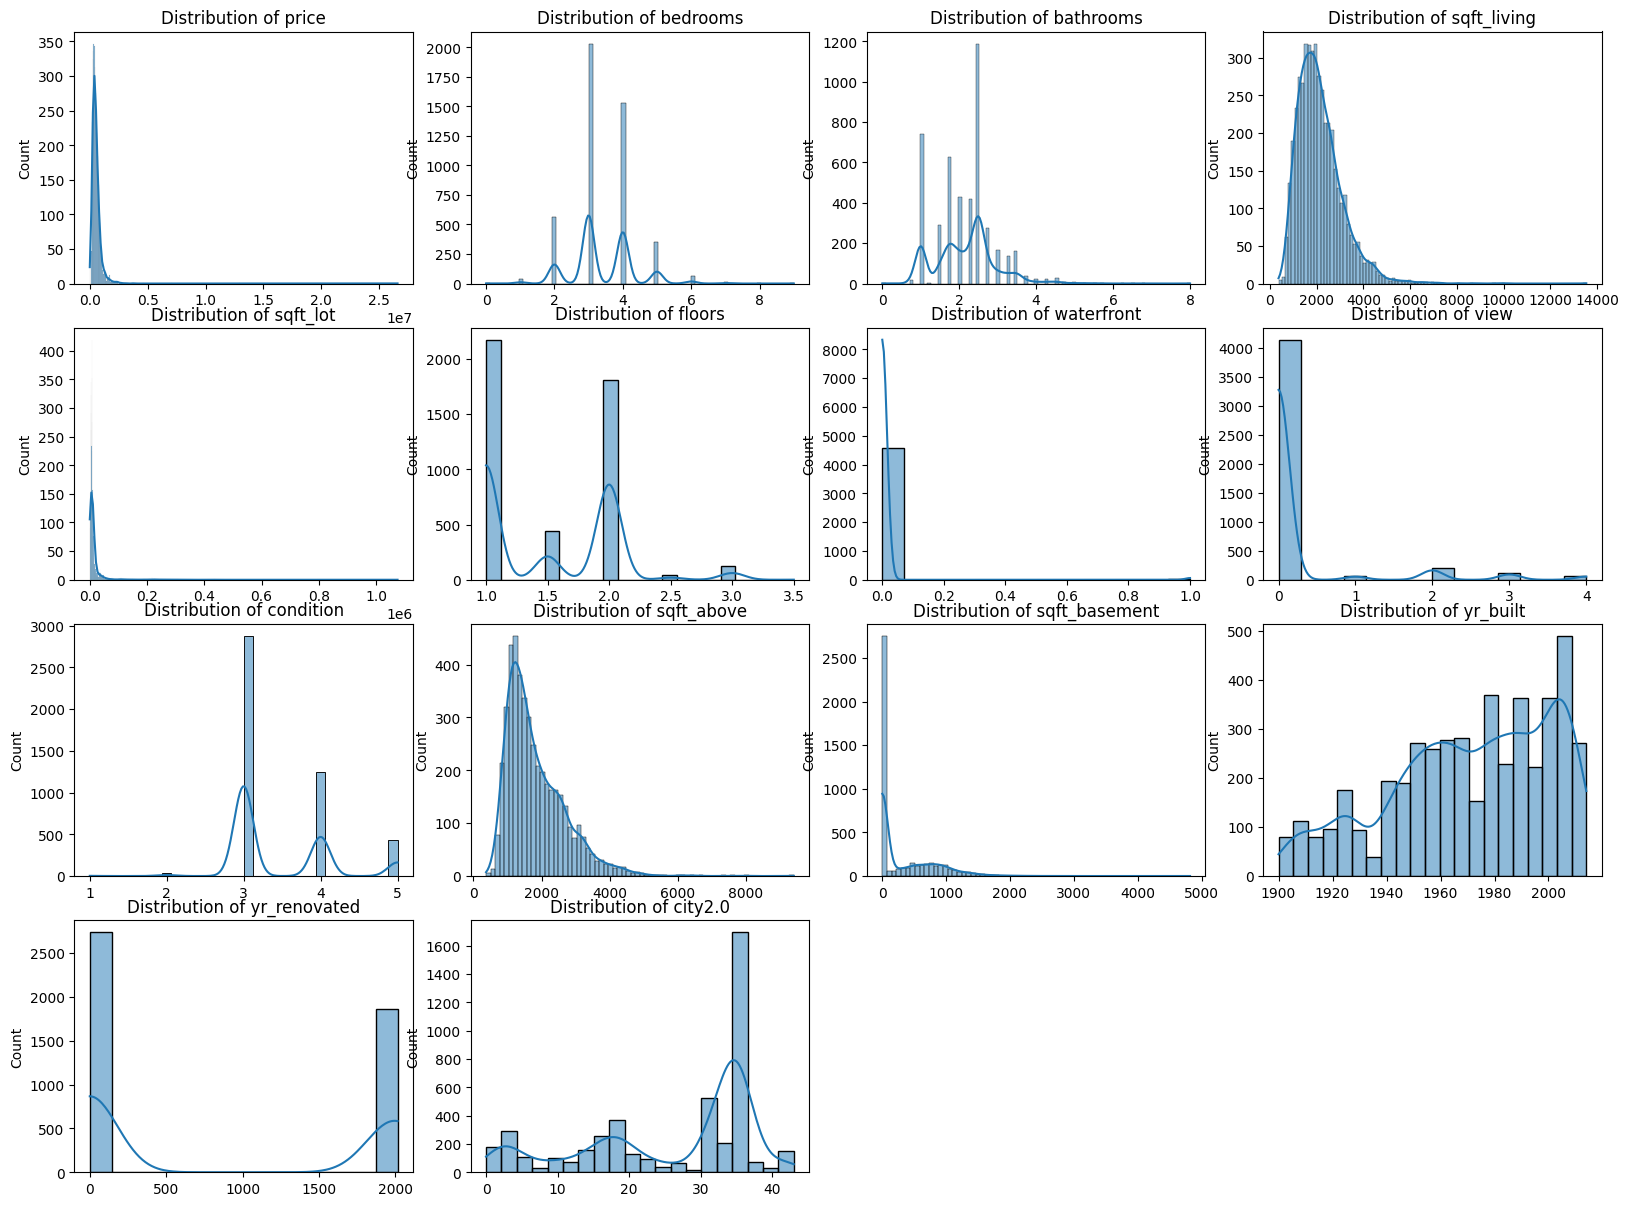

In [ ]:
df_ncol = df.select_dtypes(include=['int64', 'float64'])
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.tight_layout()
for i, column in enumerate(df_ncol.columns):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.histplot(data=df_ncol, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
if i < 15:
    for j in range(i + 1, 16):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col])
plt.show()

In [ ]:
df_ncol

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city2.0
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35


In [ ]:
scaler=MinMaxScaler()
for column in df_ncol.columns:
  df_ncol[column]=scaler.fit_transform(df_ncol[[column]])

In [ ]:
df_ncol

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city2.0
0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531,0.837209
1,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000,0.813953
2,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000,0.418605
3,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000,0.069767
4,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076,0.720930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.011590,0.333333,0.21875,0.086560,0.005330,0.0,0.0,0.0,0.75,0.126106,0.000000,0.473684,0.982622,0.813953
4596,0.020095,0.333333,0.31250,0.082764,0.006460,0.4,0.0,0.0,0.50,0.120575,0.000000,0.728070,0.997517,0.069767
4597,0.015679,0.333333,0.31250,0.200456,0.005939,0.4,0.0,0.0,0.50,0.292035,0.000000,0.956140,0.000000,0.744186
4598,0.007649,0.444444,0.25000,0.130600,0.005581,0.0,0.0,0.0,0.50,0.077434,0.211618,0.649123,0.000000,0.813953


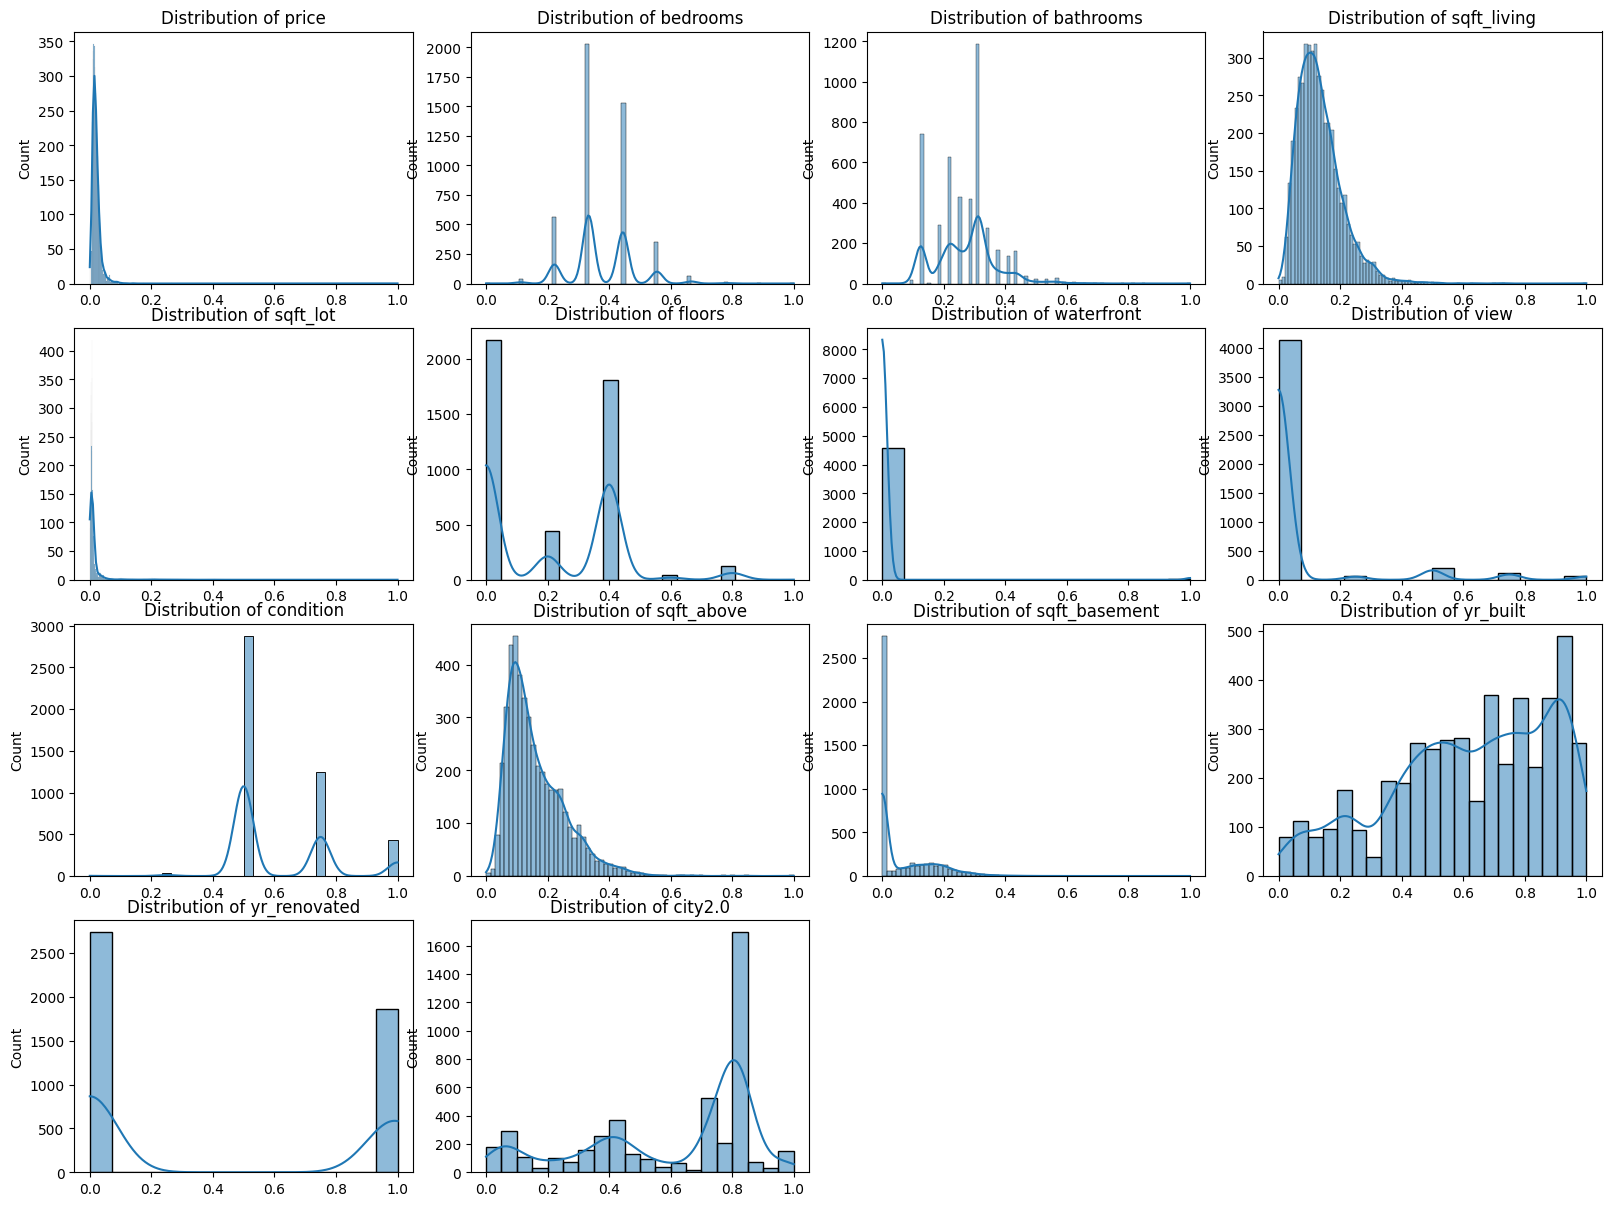

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.tight_layout()
for i, column in enumerate(df_ncol.columns):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.histplot(data=df_ncol, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
if i < 15:
    for j in range(i + 1, 16):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col])
plt.show()

In [ ]:
from scipy.stats import zscore
df_ncol1=df_ncol.apply(zscore)

In [ ]:
df_ncol1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city2.0
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,0.861805
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,0.778343
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.640521
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,-1.892459
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,0.444493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.432437,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464,-0.564651,1.195121,0.778343
4596,-0.031271,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464,0.410840,1.225755,-1.892459
4597,-0.239562,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464,1.285418,-0.825693,0.527955
4598,-0.618268,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401,0.108101,-0.825693,0.778343


In [ ]:
outlier=(df_ncol1>3)|(df_ncol1<-3)
outlier.sum()

price             34
bedrooms          19
bathrooms         27
sqft_living       50
sqft_lot          78
floors             2
waterfront        33
view             186
condition          6
sqft_above        53
sqft_basement     46
yr_built           0
yr_renovated       0
city2.0            0
dtype: int64

In [ ]:
outlier_rows=np.any(outlier,axis=1)
df_ncol1=df_ncol1[~outlier]

In [ ]:
((df_ncol1>3)|(df_ncol1<-3)).sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city2.0          0
dtype: int64

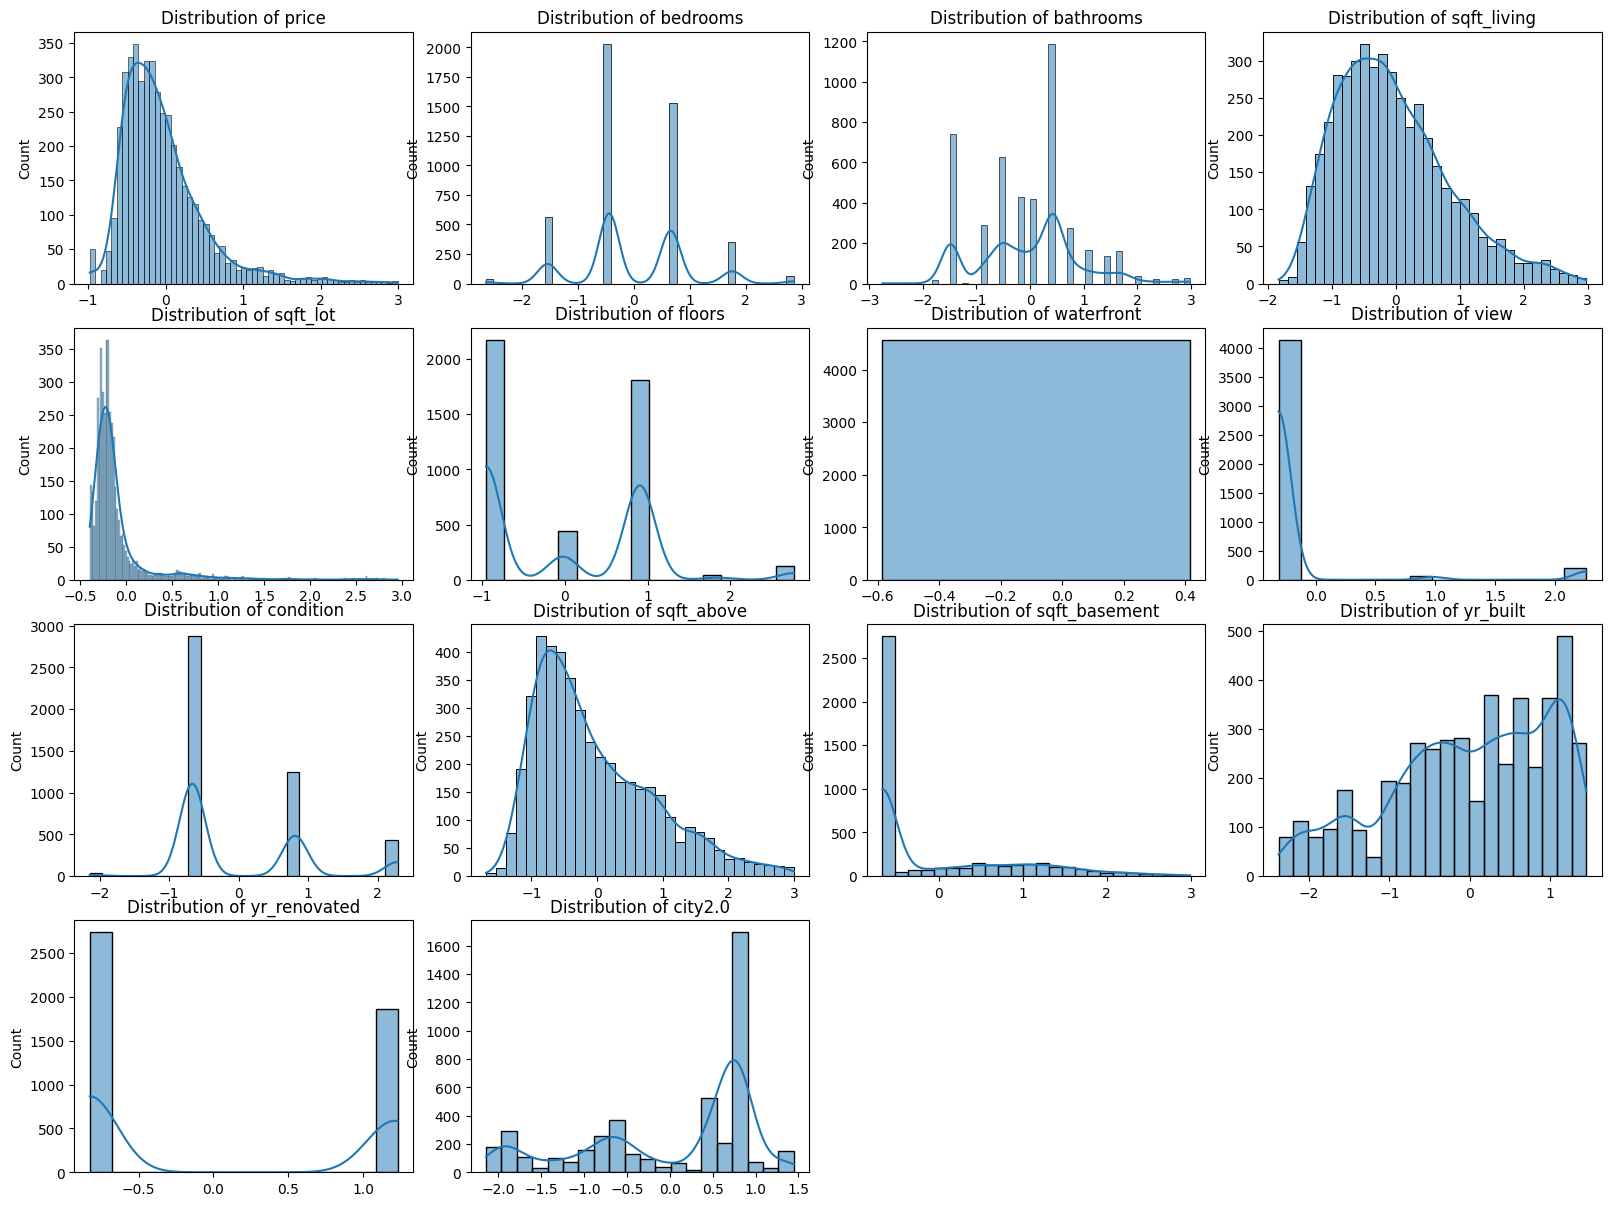

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.tight_layout()
for i, column in enumerate(df_ncol1.columns):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.histplot(data=df_ncol1, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
if i < 15:
    for j in range(i + 1, 16):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col])
plt.show()

In [ ]:
df_ncol1

price             34
bedrooms          19
bathrooms         27
sqft_living       50
sqft_lot          78
floors             2
waterfront        33
view             186
condition          6
sqft_above        53
sqft_basement     46
yr_built           0
yr_renovated       0
city2.0            0
dtype: int64

In [ ]:
df_ncol=df_ncol[~((df_ncol1>3)|(df_ncol1<-3)).any(axis=1)]


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city2.0          0
dtype: int64

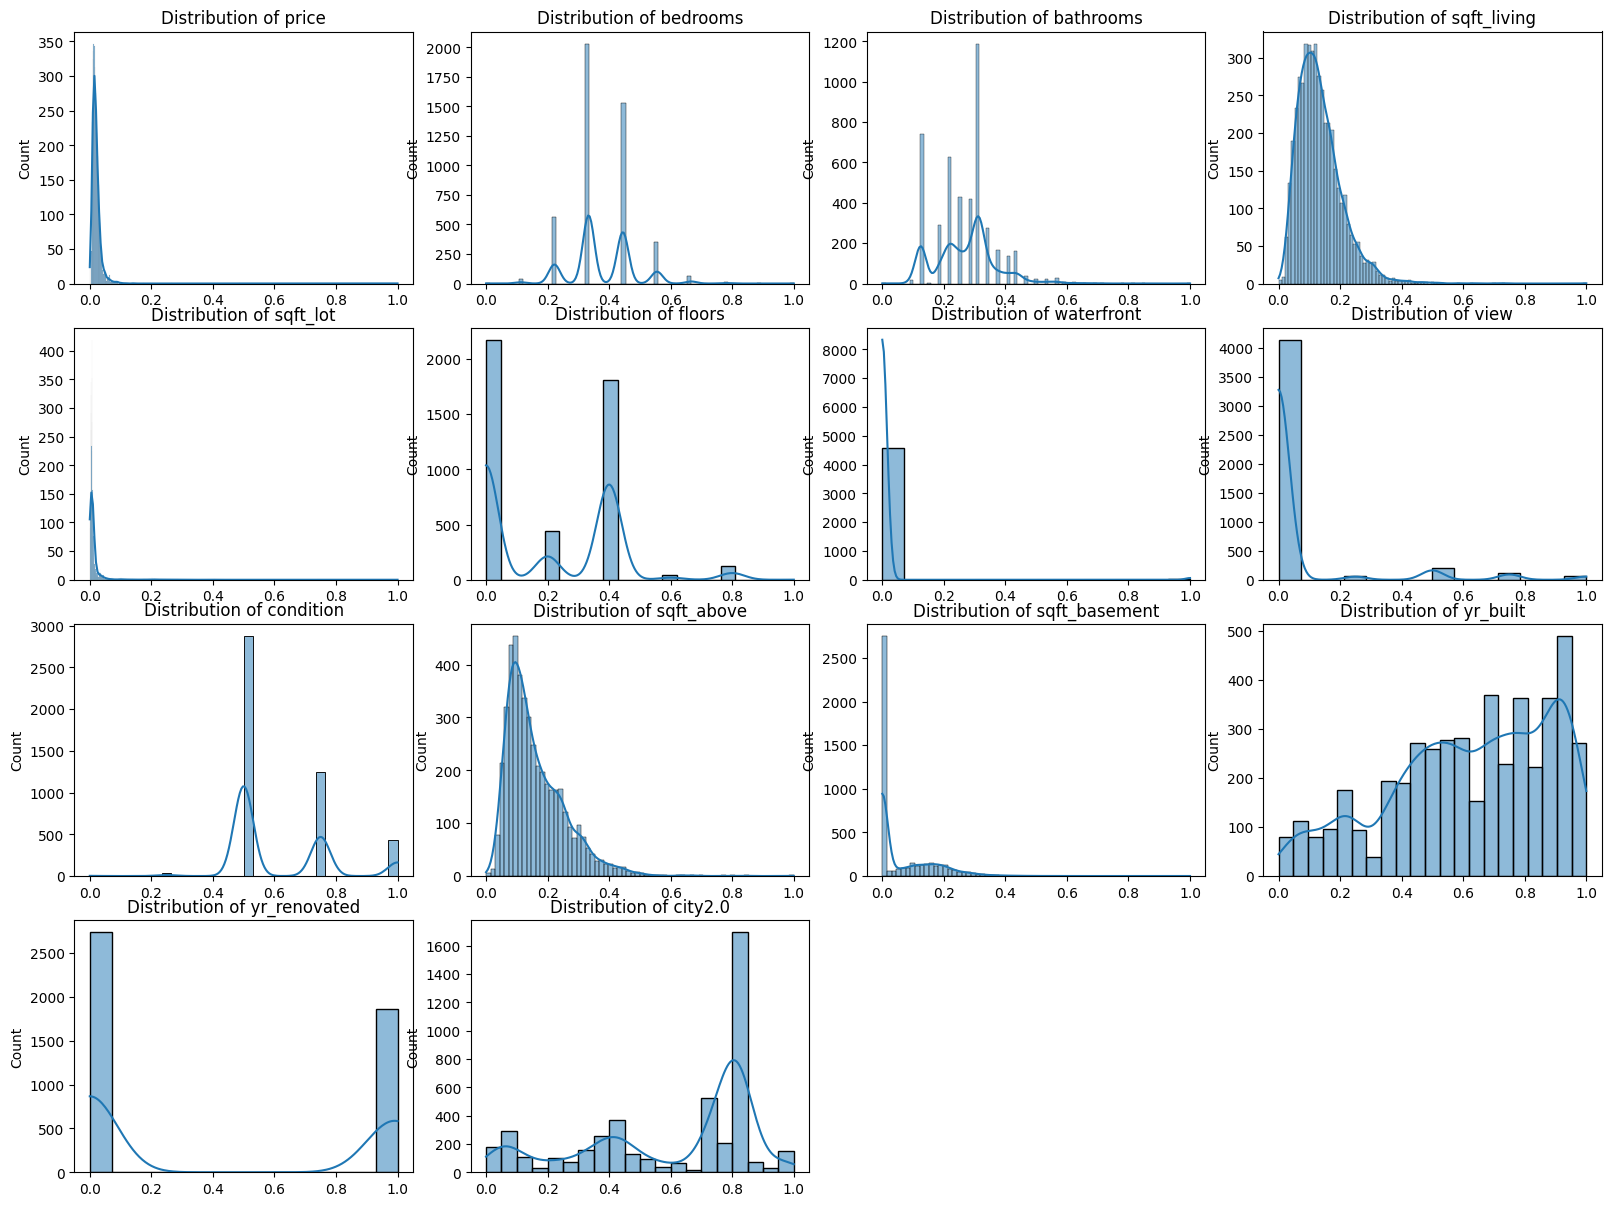

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.tight_layout()
for i, column in enumerate(df_ncol.columns):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.histplot(data=df_ncol, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
if i < 15:
    for j in range(i + 1, 16):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X=df_ncol.drop(columns=['waterfront'],axis=1)
y=df_ncol['waterfront']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)